import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import numpy as np
import math
import scipy
import scipy.ndimage
from skimage import feature

# 1. Calculate Image gradient of tiger image (20 points)

- read and show the tiger image
- show the gradient of x and y, respectively

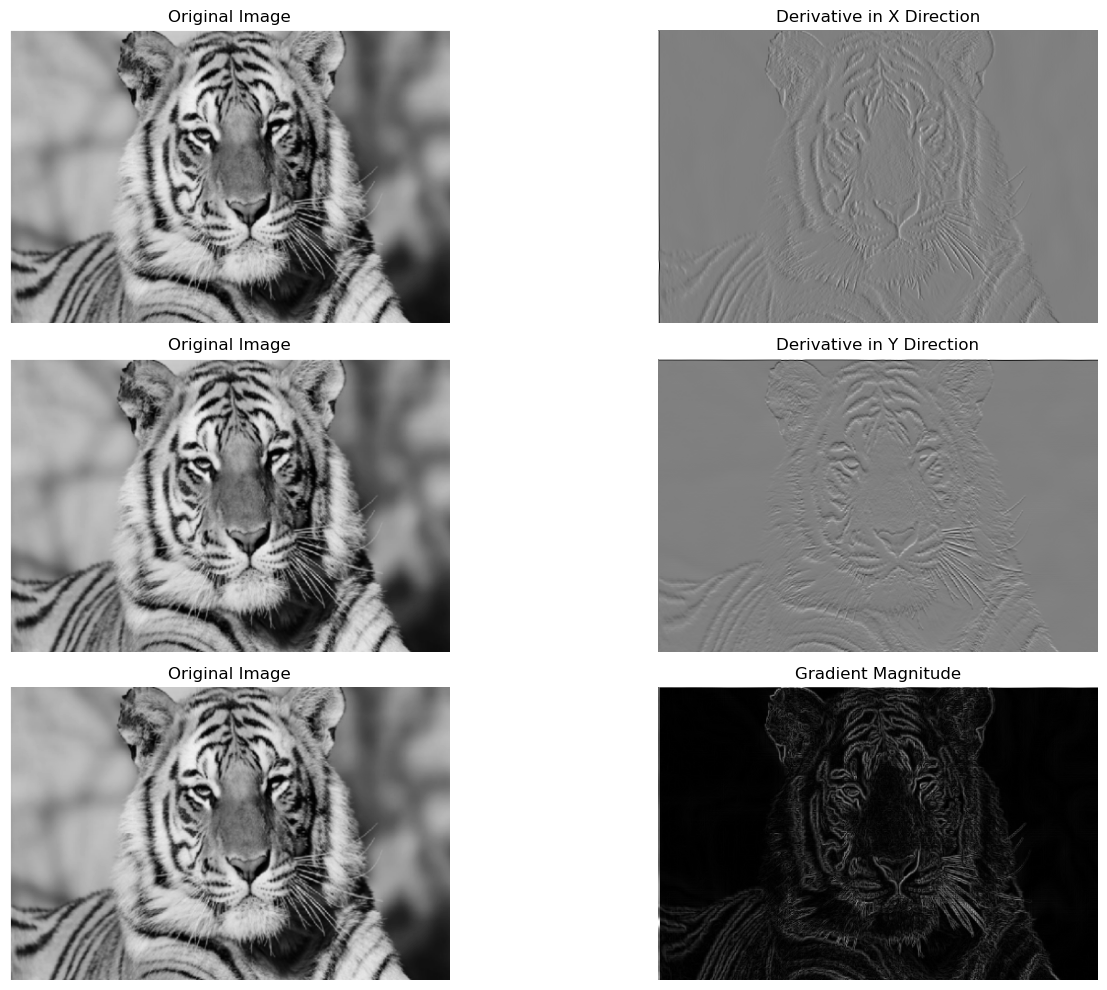

In [93]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Read and resize the tiger image
img_tiger = cv2.imread('tiger.png', cv2.IMREAD_GRAYSCALE)
img_tiger = cv2.resize(img_tiger, (480, 320))

# Step 2: Compute the image derivative in the x and y directions
mask_x = np.array([[-1, 1]])  # Derivative mask in X direction
mask_y = mask_x.T             # Derivative mask in Y direction

derX = cv2.filter2D(img_tiger.astype(np.float32), -1, mask_x)  # Derivative in X direction
derY = cv2.filter2D(img_tiger.astype(np.float32), -1, mask_y)  # Derivative in Y direction

# Step 3: Calculate the gradient magnitude
Gmag = np.sqrt(derX**2 + derY**2)

# Step 4: Display the original image with gradients and gradient magnitude side by side
plt.figure(figsize=(15, 10))

# Original and Derivative in X direction
plt.subplot(3, 2, 1)
plt.imshow(img_tiger, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(derX, cmap='gray')
plt.title('Derivative in X Direction')
plt.axis('off')

# Original and Derivative in Y direction
plt.subplot(3, 2, 3)
plt.imshow(img_tiger, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(derY, cmap='gray')
plt.title('Derivative in Y Direction')
plt.axis('off')

# Original and Gradient Magnitude
plt.subplot(3, 2, 5)
plt.imshow(img_tiger, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(Gmag, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()


# 2. Implement Sobel edge detection of bird image (30 points)

- read and show the bird image
- show the gradient of x and y, respectively
- show gradient magnitude
- show results of different thresholds


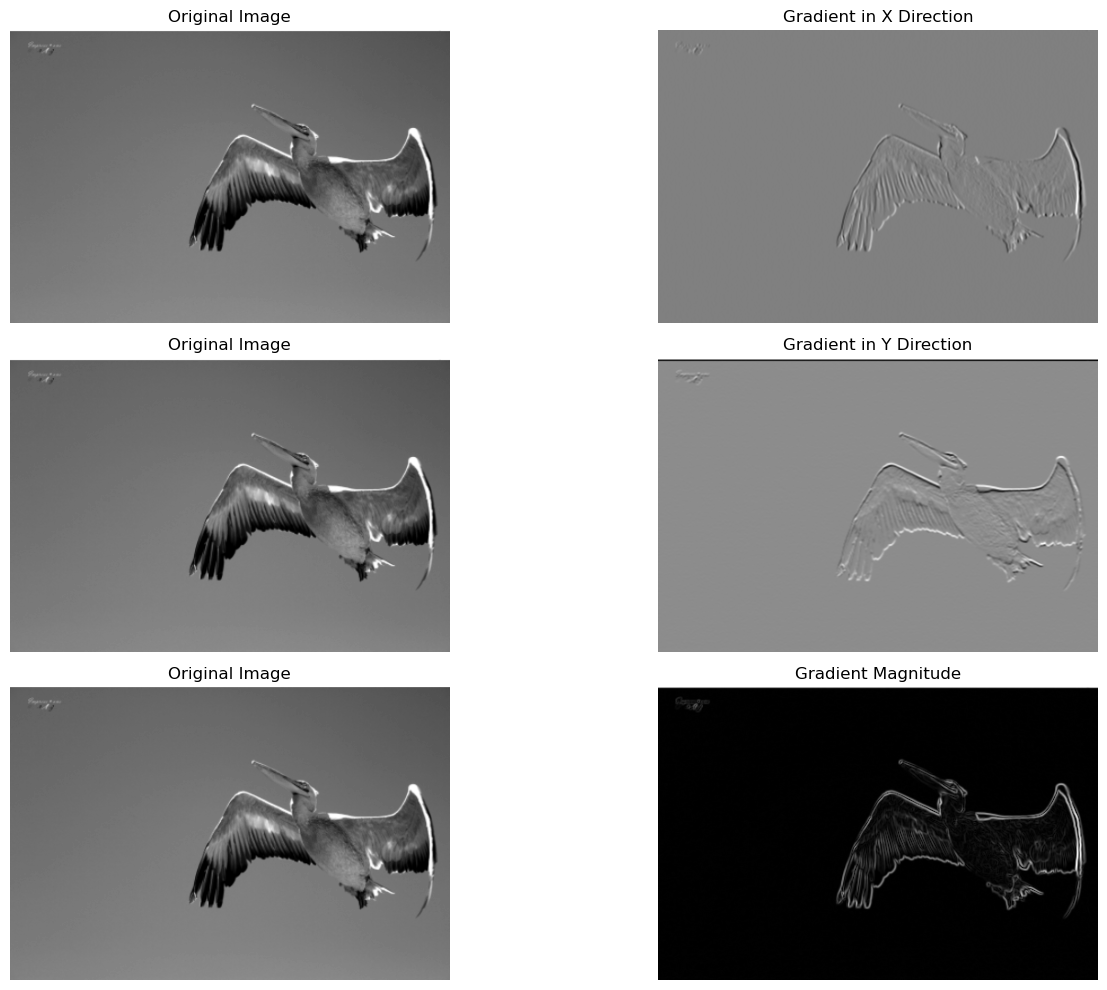

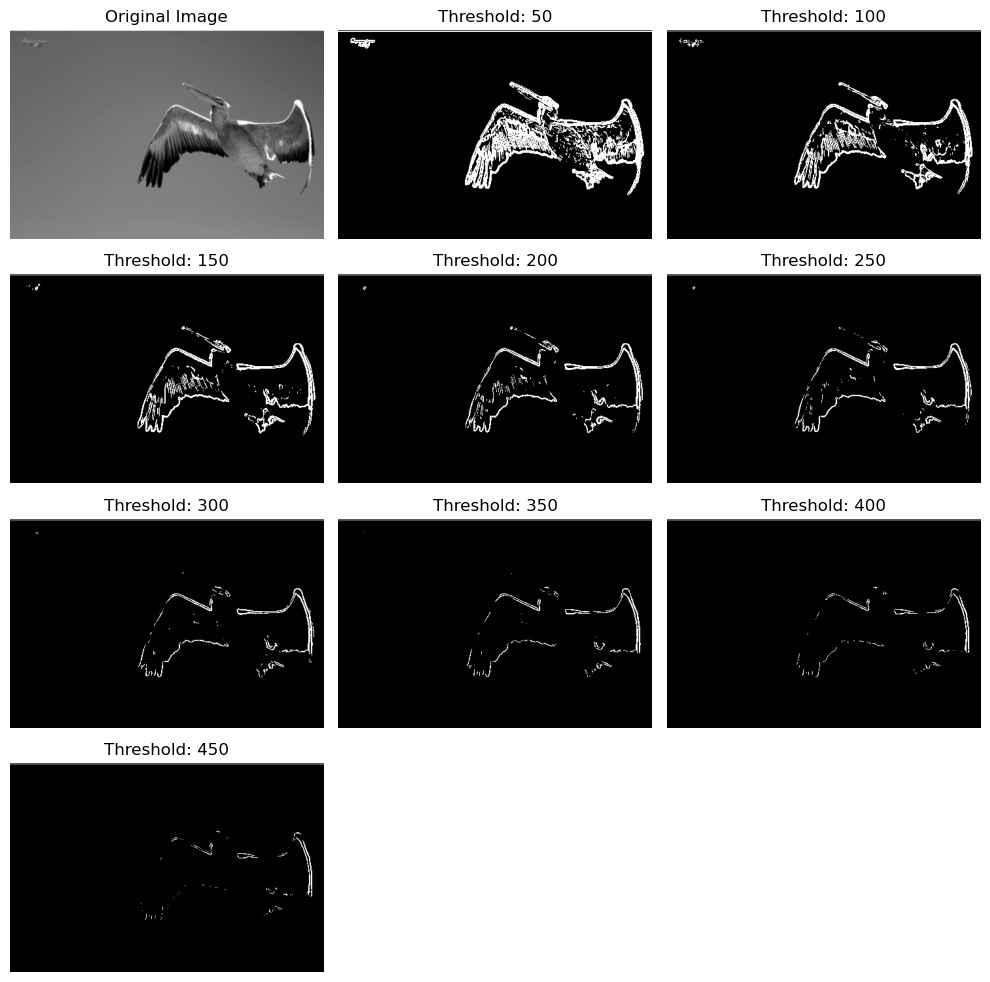

In [100]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Read and resize bird image
img_bird = cv2.imread('bird.png', cv2.IMREAD_GRAYSCALE)
img_bird = cv2.resize(img_bird, (480, 320))

# Step 2: Sobel gradient in x and y direction
gx = cv2.Sobel(img_bird, cv2.CV_64F, 1, 0, ksize=3)  # Gradient in X direction
gy = cv2.Sobel(img_bird, cv2.CV_64F, 0, 1, ksize=3)  # Gradient in Y direction

# Step 3: Gradient magnitude
gmag, gdir = cv2.cartToPolar(gx, gy, angleInDegrees=True)

# Step 4: Display original image alongside gradients and gradient magnitude side by side
plt.figure(figsize=(15, 10))

# Original and Gradient in X direction
plt.subplot(3, 2, 1)
plt.imshow(img_bird, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(gx, cmap='gray')
plt.title('Gradient in X Direction')
plt.axis('off')

# Original and Gradient in Y direction
plt.subplot(3, 2, 3)
plt.imshow(img_bird, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(gy, cmap='gray')
plt.title('Gradient in Y Direction')
plt.axis('off')

# Original and Gradient Magnitude
plt.subplot(3, 2, 5)
plt.imshow(img_bird, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(gmag / gmag.max(), cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.tight_layout()
plt.show()

# Step 5: Apply different thresholds and show binary images
plt.figure(figsize=(10, 10))

# Show Original Image again for comparison
plt.subplot(4, 3, 1)
plt.imshow(img_bird, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Apply thresholds to the gradient magnitude
for i, t in enumerate(range(50, 500, 50)):
    binary_img = gmag > t
    plt.subplot(4, 3, i + 2)
    plt.imshow(binary_img, cmap='gray')
    plt.title(f'Threshold: {t}')
    plt.axis('off')

plt.tight_layout()
plt.show()


# 3. Implement LOG edge detection of bird image (20 points)

- read and show the bird image
- show results of LOG edge detection

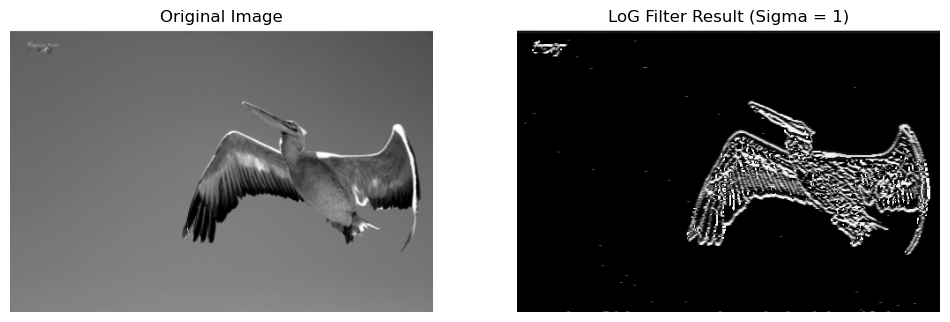

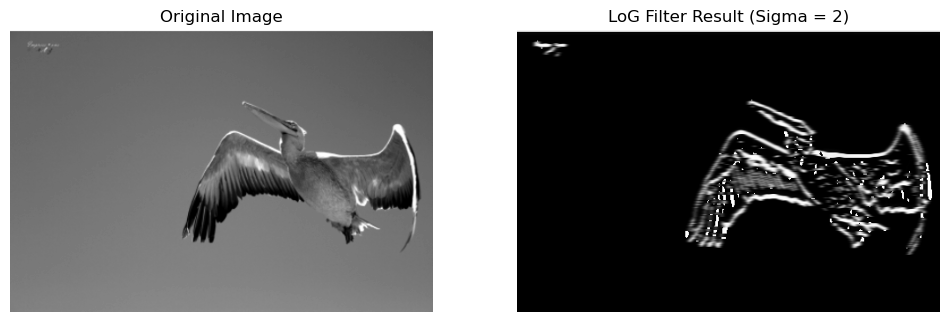

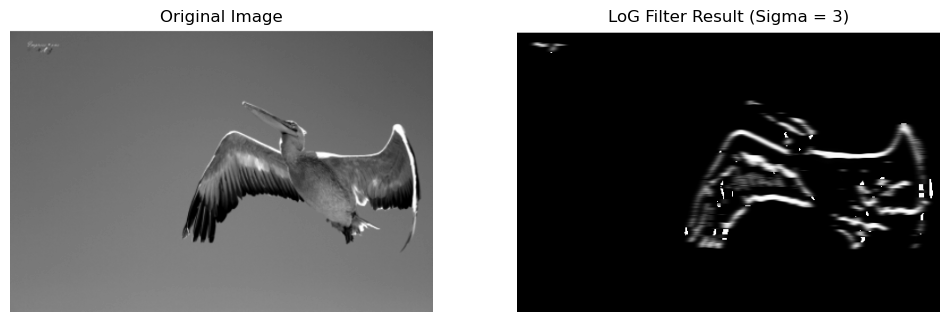

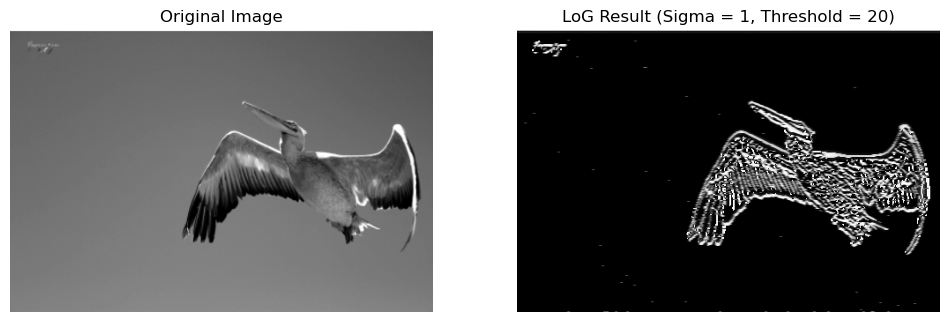

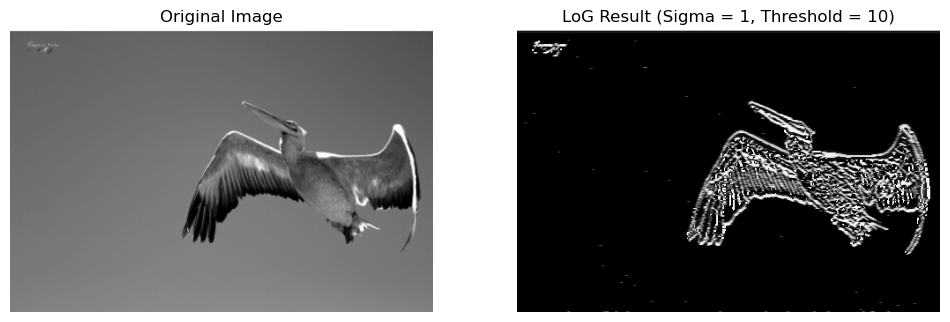

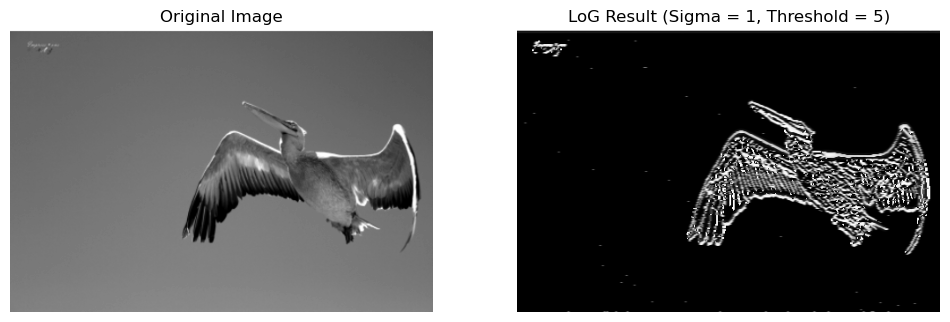

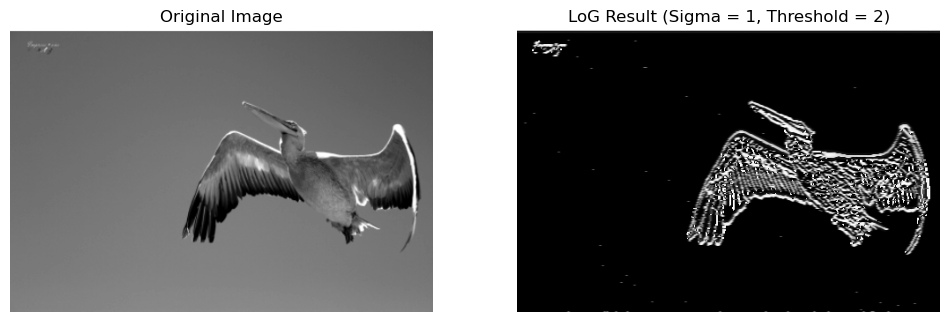

In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_laplace

# Step 1: Load and resize the bird image
bird_image = cv2.imread('bird.png', cv2.IMREAD_GRAYSCALE)  # Load the image in grayscale
resized_bird = cv2.resize(bird_image, (480, 320))  # Resize the image to 480x320

# Function to apply Laplacian of Gaussian (LoG) filter and visualize the results
def show_log_filter_results(input_image, sigma_value):
    # Apply the LoG filter
    log_result = gaussian_laplace(input_image, sigma=sigma_value)

    # Normalize the result for better visibility
    log_result = (log_result - log_result.min()) / (log_result.max() - log_result.min())

    # Set up the figure for displaying images side by side
    plt.figure(figsize=(12, 6))

    # Display the original image on the left
    plt.subplot(1, 2, 1)
    plt.imshow(input_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Display the filtered image on the right
    plt.subplot(1, 2, 2)
    plt.imshow(log_result, cmap='gray')
    plt.title(f'LoG Filter Result (Sigma = {sigma_value})')
    plt.axis('off')

    plt.show()

# Apply LoG for sigma = 1
show_log_filter_results(resized_bird, sigma_value=1)

# Apply LoG for sigma = 2
show_log_filter_results(resized_bird, sigma_value=2)

# Apply LoG for sigma = 3
show_log_filter_results(resized_bird, sigma_value=3)

# Function to apply LoG filter and visualize results with a specified threshold
def show_log_filter_results_with_threshold(input_image, sigma_value, threshold_value):
    # Apply the LoG filter
    log_result = gaussian_laplace(input_image, sigma=sigma_value)
    
    # Normalize the result for better visibility
    log_result = (log_result - log_result.min()) / (log_result.max() - log_result.min())

    # Set up the figure for displaying images side by side
    plt.figure(figsize=(12, 6))

    # Display the original image on the left
    plt.subplot(1, 2, 1)
    plt.imshow(input_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Display the LoG result on the right
    plt.subplot(1, 2, 2)
    plt.imshow(log_result, cmap='gray')
    plt.title(f'LoG Result (Sigma = {sigma_value}, Threshold = {threshold_value})')
    plt.axis('off')

    plt.show()

# LoG with sigma = 1 and threshold = 20
show_log_filter_results_with_threshold(resized_bird, sigma_value=1, threshold_value=20)

# LoG with sigma = 1 and threshold = 10
show_log_filter_results_with_threshold(resized_bird, sigma_value=1, threshold_value=10)

# LoG with sigma = 1 and threshold = 5
show_log_filter_results_with_threshold(resized_bird, sigma_value=1, threshold_value=5)

# LoG with sigma = 1 and threshold = 2
show_log_filter_results_with_threshold(resized_bird, sigma_value=1, threshold_value=2)


# 4. Implement Canny edge detection of bird image (20 points)

- show results of Canny edge detection

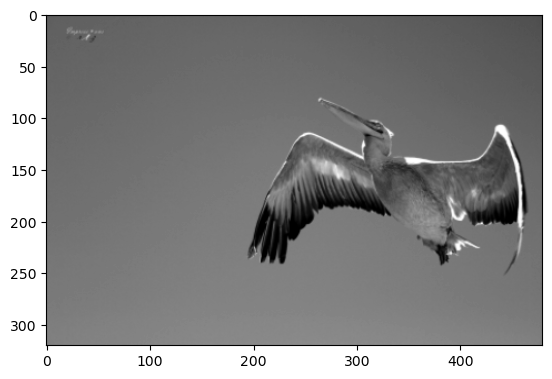

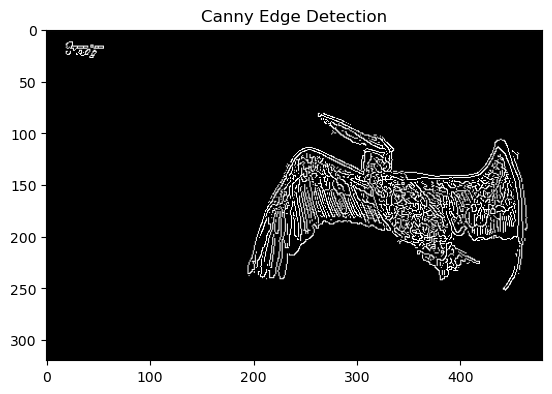

In [99]:
# Read and resize bird image
img_bird = cv2.imread('bird.png', cv2.IMREAD_GRAYSCALE)
img_bird = cv2.resize(img_bird, (480, 320))
plt.imshow(resized_image, cmap='gray')
# Apply Canny edge detection
edges = cv2.Canny(img_bird, 0.03, 20)

# Show Canny edge detection result
plt.figure()
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()


# 5. Given Gaussian function: $g(x,y) = \frac{1}{\sqrt{2\pi}\sigma} e^{(-\frac{x^2 + y^2}{2\sigma^2})}$ , calculate $\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2}$ 
# (10 points)

(You can search for how to use LaTex to write equations if you don't know how to write.)

# Gaussian Function and Its Laplacian

Given the Gaussian function:

$$
g(x, y) = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{x^2 + y^2}{2\sigma^2}},
$$

we want to calculate 

$$
\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2}.
$$

## Step 1: First Derivatives

### First Derivative with respect to \( x \):

Using the chain rule, we have:

$$
\frac{\partial g}{\partial x} = \frac{1}{\sqrt{2\pi} \sigma} e^{-\frac{x^2 + y^2}{2\sigma^2}} \left(-\frac{2x}{2\sigma^2}\right) = -\frac{x}{\sigma^2} g(x, y).
$$

### First Derivative with respect to \( y \):

Similarly, we find:

$$
\frac{\partial g}{\partial y} = -\frac{y}{\sigma^2} g(x, y).
$$

## Step 2: Second Derivatives

### Second Derivative with respect to \( x \):

Using the product rule, we get:

$$
\frac{\partial^2 g}{\partial x^2} = \frac{\partial}{\partial x} \left(-\frac{x}{\sigma^2} g(x, y)\right) = -\frac{1}{\sigma^2} g(x, y) + \left(-\frac{x}{\sigma^2}\right) \left(-\frac{x}{\sigma^2} g(x, y)\right).
$$

This simplifies to:

$$
\frac{\partial^2 g}{\partial x^2} = \left(-\frac{1}{\sigma^2} + \frac{x^2}{\sigma^4}\right) g(x, y).
$$

### Second Derivative with respect to \( y \):

Using the same approach:

$$
\frac{\partial^2 g}{\partial y^2} = \left(-\frac{1}{\sigma^2} + \frac{y^2}{\sigma^4}\right) g(x, y).
$$

## Step 3: Combine the Second Derivatives

Now, summing the second derivatives:

$$
\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2} = \left(-\frac{1}{\sigma^2} + \frac{x^2}{\sigma^4}\right) g(x, y) + \left(-\frac{1}{\sigma^2} + \frac{y^2}{\sigma^4}\right) g(x, y).
$$

Combining terms gives us:

$$
\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2} = \left(-\frac{2}{\sigma^2} + \frac{x^2 + y^2}{\sigma^4}\right) g(x, y).
$$

## Final Result

Thus, the final expression for 

$$
\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2}
$$ 

is:

$$
\frac{\partial^2 g}{\partial x^2} + \frac{\partial^2 g}{\partial y^2} = \left(-\frac{2}{\sigma^2} + \frac{x^2 + y^2}{\sigma^4}\right) g(x, y).
$$
